In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import hist
import matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import tqdm

import sys
import os
sys.path.append("../..")
from hists.parameters import synchrotronBeamEnergiesMap, beamEnergies
from hists.dataframe import DataframeComputations
from HistogramLib.histogram import HistogramKind
from HistogramLib.store import HistogramStore
from hists.store import HistogramId
from ntupleReaders.clue_ntuple_reader import ClueNtupleReader

from event_visualizer.notebook_visualizer import EventDisplay
from event_visualizer.event_index import EventLoader, EventID

In [2]:
reader = ClueNtupleReader("v41", "cmssw", "data")
loader = EventLoader(reader.pathToFile)

In [3]:
evt = loader.loadEvent(EventID(250, 654, 4962))

In [4]:
evt.rechits_df[["clus3D_id", "rechits_layer", "rechits_energy"]]

,clus3D_id,rechits_layer,rechits_energy
rechits_id,,,
0,0.0,1,0.007422
1,0.0,1,0.006386
2,0.0,1,1.038366
3,0.0,1,0.113985
4,0.0,1,0.179772
...,...,...,...
1084,NaN,28,0.013475
1085,NaN,28,0.004562
1086,NaN,28,0.045601


In [5]:
profile_rechits = evt.rechits_df[["rechits_layer", "rechits_energy"]].groupby(["rechits_layer"]).agg(energySumPerLayer=pd.NamedAgg("rechits_energy", "sum"))
profile_rechits

,energySumPerLayer
rechits_layer,
1,1.345931
2,3.364662
3,8.666971
4,9.735699
5,13.125682
6,13.465888
7,12.923879
8,13.348291
9,11.570465


(0.5, 28.5)

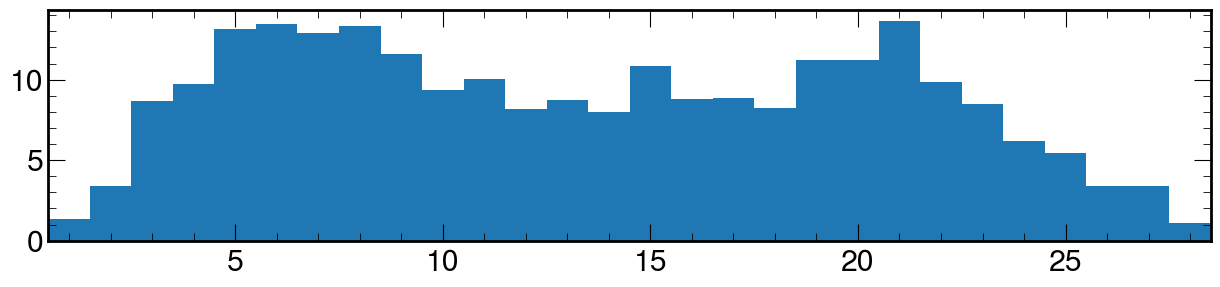

In [6]:
plt.figure(figsize=(15, 3))
hep.histplot(profile_rechits.energySumPerLayer.to_numpy(), bins=np.array(range(0, 29))+0.5, histtype="fill")
# plt.xlabel("Layer")
# plt.ylabel("Energy on layer (GeV)")
plt.xlim(0.5, 28.5)

(0.0, 15.0)

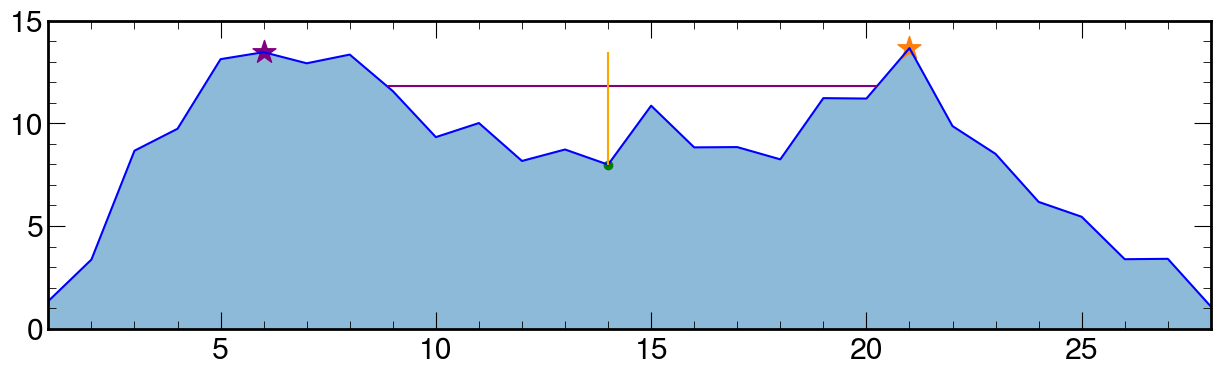

In [31]:
plt.figure(figsize=(15, 4))
xVals = np.array(range(0, 28))+1.
plt.plot(xVals, profile_rechits.energySumPerLayer.to_numpy(), color="blue")
plt.fill_between(xVals, profile_rechits.energySumPerLayer.to_numpy(), alpha=0.5)

factor=-1
plt.hlines(factor * -11.8228, 7.858066+1, 19.250887+1, 
              colors=["purple"], label="Dip width")
plt.vlines(x=14, ymin=profile_rechits.energySumPerLayer.loc[14] - factor*5.476961, ymax=profile_rechits.energySumPerLayer.loc[14],
              color="orange", label="Prominence height")

plt.scatter(x=[6], y=profile_rechits.energySumPerLayer.loc[[6]], marker="*", s=300, color="purple", label="Left and right bases")
plt.scatter(x=[21], y=profile_rechits.energySumPerLayer.loc[[21]],marker="*", s=300,  color="tab:orange", label="Left and right bases")
plt.scatter(x=[14], y=profile_rechits.energySumPerLayer.loc[[14]], color="green")


plt.xlim(1, 28)
plt.ylim(0, 15)